## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

def plot_predictions(true_data, predictions, n_samples=50):
    plt.figure(figsize = (16,5))
    plt.plot(predictions[:n_samples,1], 'r',label = 'pred')
    plt.plot(true_data[:n_samples,1],'g', label = 'true')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show()

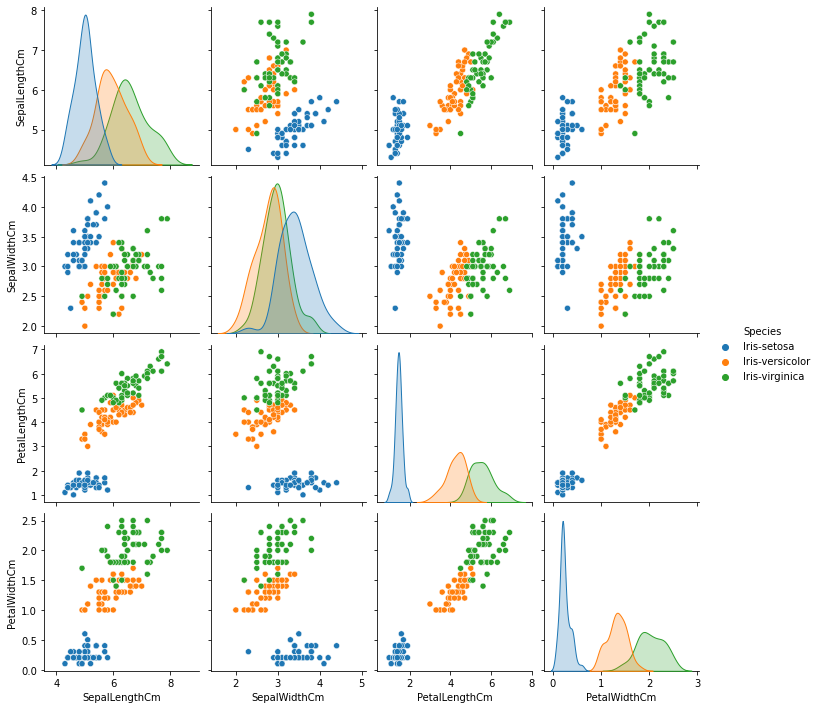

In [3]:
iris_data = pd.read_csv("Iris.csv")

g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)


In [4]:
class nn:
    def __init__(self, neuron_numb=5):
        self.w0 = 2*np.random.random((4, neuron_numb)) - 1
        self.w1 = 2*np.random.random((neuron_numb, 3)) - 1

    def feed_forward(self, X):
        layer0 = X
        layer1 = sigmoid(np.dot(layer0, self.w0))
        layer2 = sigmoid(np.dot(layer1, self.w1))
        return layer0, layer1, layer2
        
    def fit(self, X, y, learning_rate=0.05, n_steps=10000):
        errors = []
        for i in range(n_steps):
            # прямое распространение(feed forward)
            layer0, layer1, layer2 = self.feed_forward(X)

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            # коррекция
            self.w1 += layer1.T.dot(layer2_delta) * learning_rate
            self.w0 += layer0.T.dot(layer1_delta) * learning_rate
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            
        return errors
    
    def predict(self, X):
        return self.feed_forward(X)[2]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

hidden_neurons = np.arange(4, 16, 2)
n_steps_range = [10000, 15000]
learning_rates = np.linspace(0.05, 1.5, num=5)

experiments = []
for n_neirons in hidden_neurons:
    for lr in learning_rates:
        for steps in n_steps_range:
            model = nn(neuron_numb=n_neirons)
            errors = model.fit(X_train, y_train, learning_rate=lr, n_steps=steps)
            train_result = model.predict(X_train)
            accuracy = (1 - errors[-1]) * 100

            test_result = model.predict(X_test)
            accuracy_t = (1 - np.mean(np.abs(y_test - test_result))) * 100
            experiments.append({'neuron_numb': n_neirons, 'learning_rate': lr, 'train_errors': errors, 
                                'train_acc': accuracy, 'test_acc': accuracy_t, 'steps': steps})
experiments = pd.DataFrame(experiments)

neuron_num: 4 steps: 10000


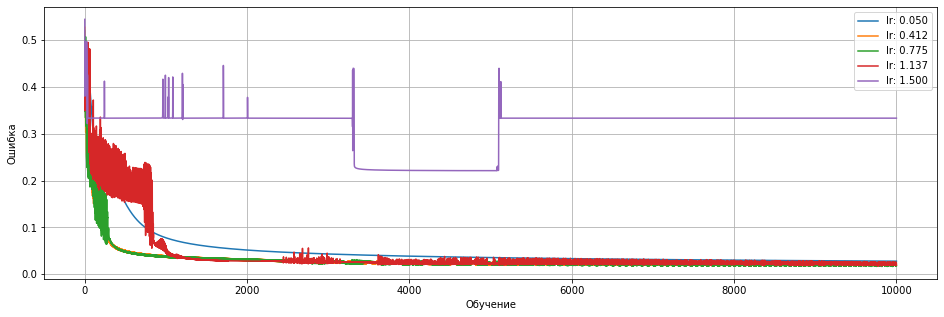

neuron_num: 4 steps: 15000


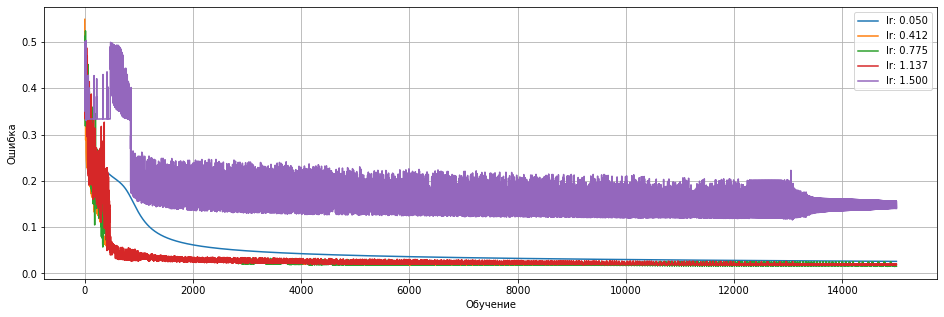

neuron_num: 6 steps: 10000


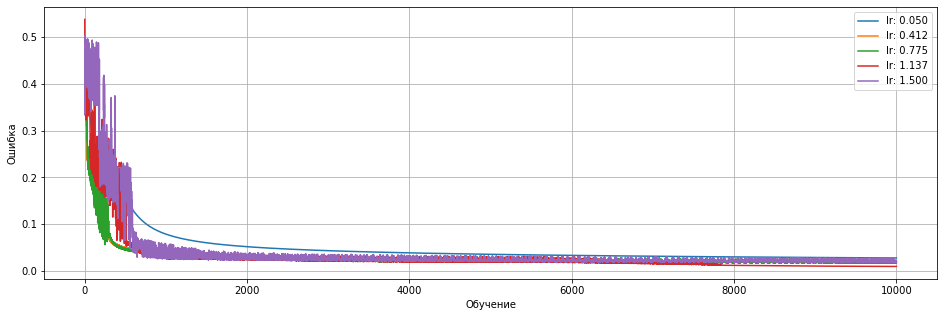

neuron_num: 6 steps: 15000


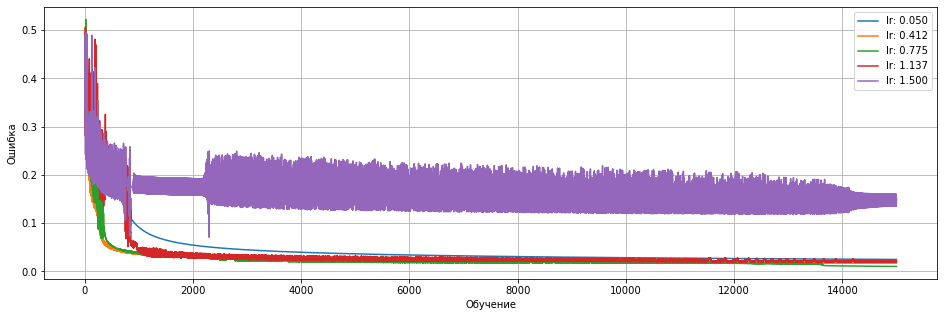

neuron_num: 8 steps: 10000


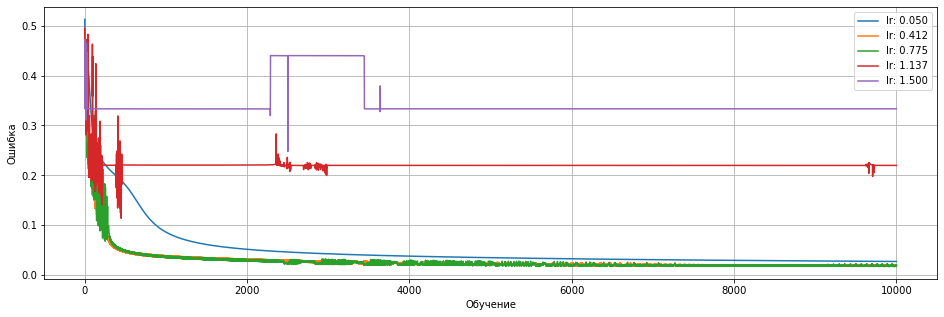

neuron_num: 8 steps: 15000


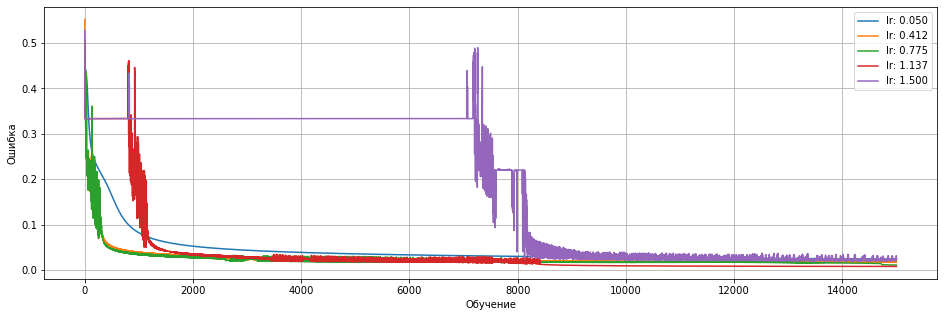

neuron_num: 10 steps: 10000


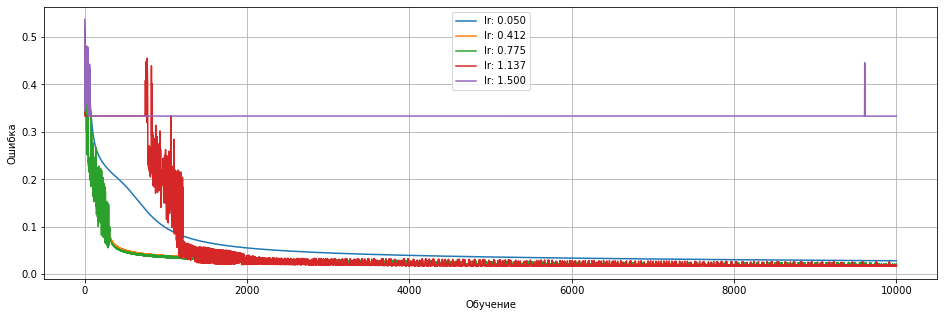

neuron_num: 10 steps: 15000


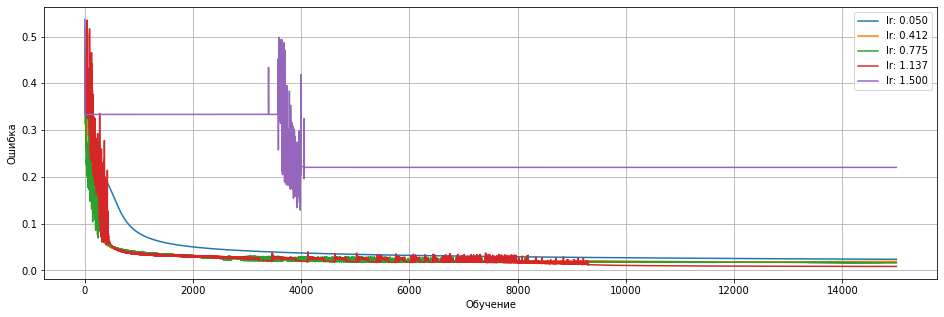

neuron_num: 12 steps: 10000


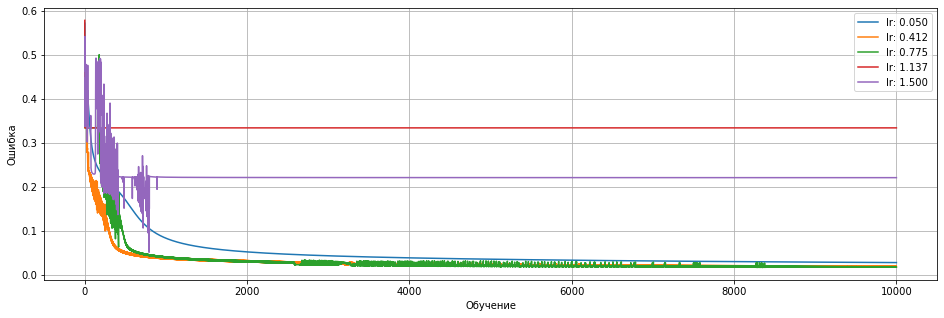

neuron_num: 12 steps: 15000


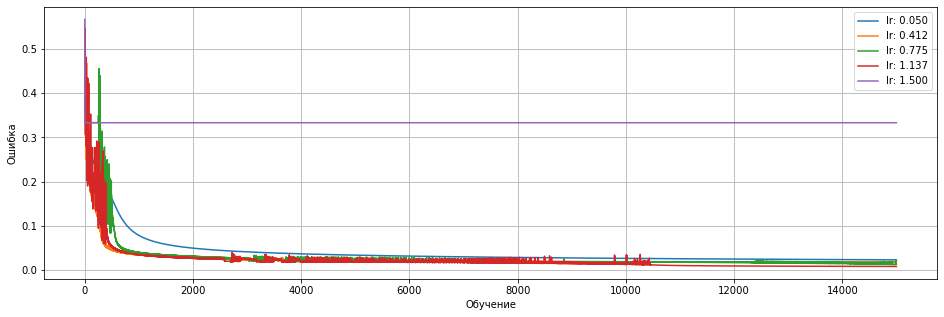

neuron_num: 14 steps: 10000


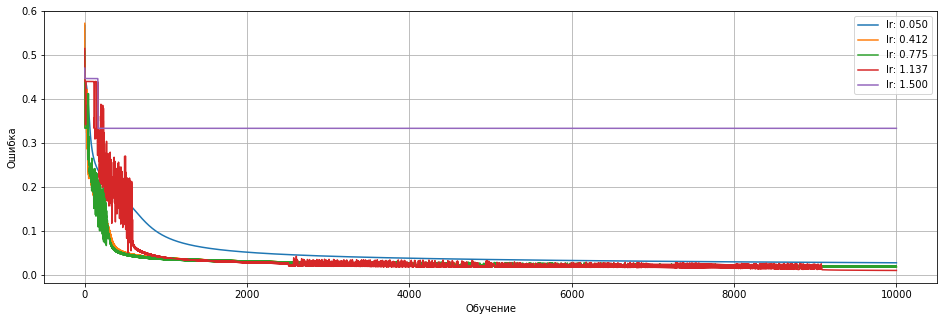

neuron_num: 14 steps: 15000


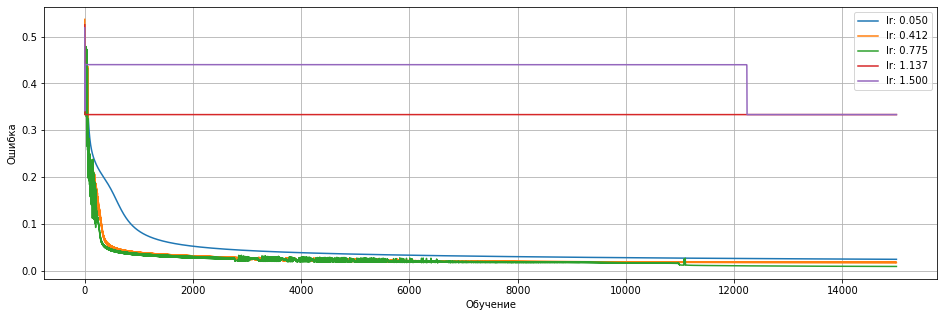

In [6]:
for result in experiments.groupby(['neuron_numb', 'steps']):
    print(f'neuron_num: {result[0][0]} steps: {result[0][1]}')
    plt.figure(figsize = (16,5))
    for row in result[1].iterrows():
        #print(row)
        plt.plot(row[1]['train_errors'], label = f"lr: {row[1]['learning_rate']:.3f}")
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.legend( )
    plt.grid()
    plt.show()

In [12]:
experiments.sort_values(by='test_acc', ascending=False).head(10)

,neuron_numb,learning_rate,train_errors,train_acc,test_acc,steps
27,8,1.1375,"[0.5017907621620857, 0.4089989581698147, 0.333...",99.179407,98.589797,15000
37,10,1.1375,"[0.4627086913314824, 0.43887078106141225, 0.42...",99.165149,98.562485,15000
47,12,1.1375,"[0.5120013577569023, 0.35236401228623965, 0.54...",99.153427,98.555107,15000
55,14,0.7750,"[0.4582001556531783, 0.43876130149101716, 0.42...",99.090576,98.527808,15000
56,14,1.1375,"[0.5147190703607782, 0.439934464571479, 0.4399...",99.015010,98.471228,10000
16,6,1.1375,"[0.5378376240499017, 0.3335203952591946, 0.333...",99.018376,98.459224,10000
15,6,0.7750,"[0.4631523152070194, 0.4169516882875277, 0.401...",98.985595,98.388556,15000
25,8,0.7750,"[0.5091802449796359, 0.3358817544388005, 0.342...",98.864229,98.312396,15000
6,4,1.1375,"[0.4742932103602113, 0.3492473654124241, 0.451...",97.923021,98.041058,10000
35,10,0.7750,"[0.4751384405003999, 0.43250426252200386, 0.34...",98.401082,97.754225,15000


* Модель показывает лучшие результаты, при увеличении learning_rate, до определенного предела, и увеличении числа итераций, число нейронов необходимо оптимизировать.
* В целом почти все модели имеют небольшое переобучение, при этом модели с меньшим числом нейронов переобучаются в меньшей степени

Обучим модель с наилучшими параметрами:

In [8]:
b_nen, b_lr, b_st = experiments.sort_values(by='test_acc', 
                                            ascending=False).head(1)[['neuron_numb', 'learning_rate', 'steps']].values[0]

model = nn(neuron_numb=int(b_nen))
errors = model.fit(X_train, y_train, learning_rate=b_lr, n_steps=int(b_st))
train_result = model.predict(X_train)
accuracy = (1 - errors[-1]) * 100

test_result = model.predict(X_test)
accuracy_t = (1 - np.mean(np.abs(y_test - test_result))) * 100

Train_result


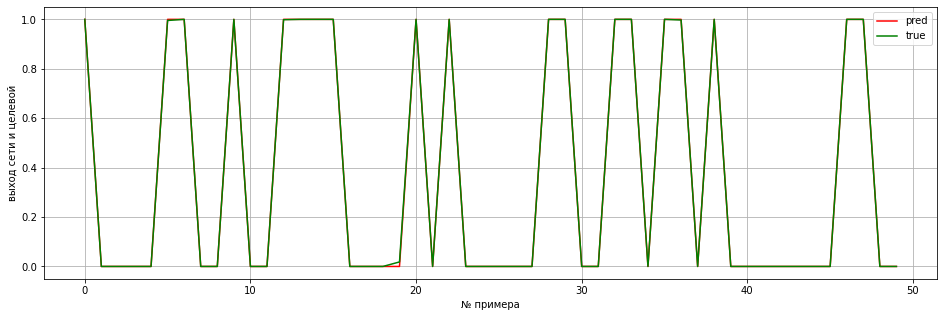

Аккуратность нейронной сети на трейне 99.19%
Test_result


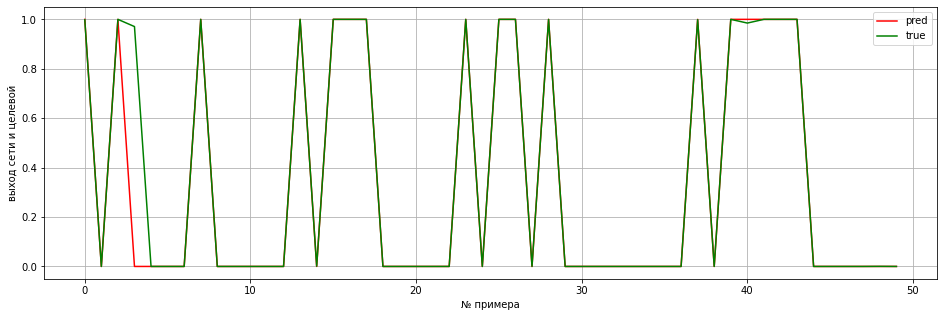

Аккуратность нейронной сети на тесте 98.62%


In [9]:
print('Train_result')
plot_predictions(train_result, y_train, 50)
print("Аккуратность нейронной сети на трейне " + str(round(accuracy,2)) + "%")

print('Test_result')
plot_predictions(test_result, y_test, 50)
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")